In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/ishangupta/Documents/Code/texture_implementation/Data/Tesla_Charging_Data.csv')

## Overarching questions are: 
1. How frequently does charging occur over a month (or per week)
2. What is the total energy input when this charging is happening (is it substantial for a day)
3. What is the househol electrcity usage in general 

In [3]:
df

,Unnamed: 0,id,charge,chargingState,chargePercentage,chargeCompletionDate,chargeCompletedAt,chargeLimit,isPluggedIn,chargerVoltage,chargerCurrent,chargerWattage,range,latitude,longitude,createdAt
0,0,clz7er1gi00ra1075c4j81h54,NaN,idle,44,NaN,2024-07-29T19:54:26.770Z,80,False,2,0,0,121,NaN,NaN,2024-07-29T19:54:26.835Z
1,1,clz7erx7b00ro10750dlndqrv,NaN,idle,44,NaN,2024-07-29T19:55:07.740Z,80,False,2,0,0,121,NaN,NaN,2024-07-29T19:55:08.179Z
2,2,clz7eyf5q00sm1075qv5lp7v5,NaN,idle,44,NaN,2024-07-29T20:00:07.482Z,80,False,2,0,0,121,NaN,NaN,2024-07-29T20:00:07.488Z
3,3,clz7f4t7c00tc1075rabrcqr0,NaN,idle,44,NaN,2024-07-29T20:05:09.545Z,80,False,2,0,0,122,NaN,NaN,2024-07-29T20:05:09.547Z
4,4,clz7fb69k00tw10754ssqaugg,NaN,idle,45,NaN,2024-07-29T20:10:06.373Z,80,False,2,0,0,124,NaN,NaN,2024-07-29T20:10:06.376Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,4295,cm01y4tn2051anus2q4h7kr5m,NaN,discharging,66,NaN,2024-08-20T04:50:06.233Z,80,False,2,0,0,178,47.629875,-122.300983,2024-08-20T04:50:06.234Z
4296,4296,cm01yb943052enus28g3cnjbp,NaN,discharging,65,NaN,2024-08-20T04:55:05.618Z,80,False,2,0,0,177,47.629875,-122.300983,2024-08-20T04:55:05.619Z
4297,4297,cm01yhxdy054anus2lxqmrj0q,NaN,discharging,65,NaN,2024-08-20T05:00:06.322Z,80,False,2,0,0,176,47.629875,-122.300983,2024-08-20T05:00:06.338Z
4298,4298,cm01yo3v2055unus2akxsexrl,NaN,charging,64,NaN,2024-08-20T06:40:04.638Z,80,True,239,32,7648,174,NaN,NaN,2024-08-20T05:05:04.639Z


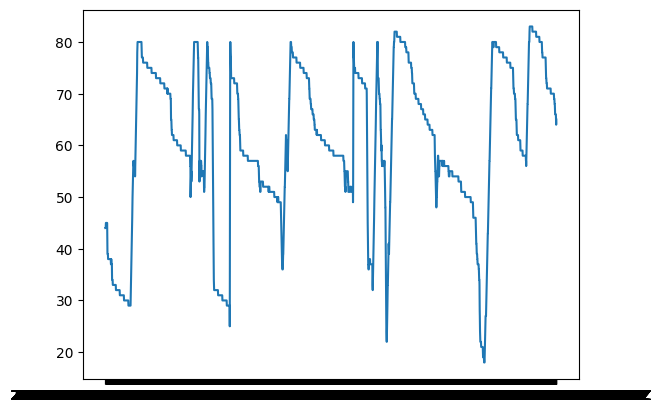

In [4]:
# plot of SOC over a few weeks
charge_percent = df['chargePercentage']
time = df['createdAt']

plt.plot(time, charge_percent)

In [13]:
# plot of charging by time of day

df['createdAt'] = pd.to_datetime(df['createdAt'])
df = df.assign(HourDay = lambda x: x['createdAt'].dt.hour)

In [14]:
df

,Unnamed: 0,id,charge,chargingState,chargePercentage,chargeCompletionDate,chargeCompletedAt,chargeLimit,isPluggedIn,chargerVoltage,chargerCurrent,chargerWattage,range,latitude,longitude,createdAt,HourDay
0,0,clz7er1gi00ra1075c4j81h54,NaN,idle,44,NaN,2024-07-29T19:54:26.770Z,80,False,2,0,0,121,NaN,NaN,2024-07-29 19:54:26.835000+00:00,19
1,1,clz7erx7b00ro10750dlndqrv,NaN,idle,44,NaN,2024-07-29T19:55:07.740Z,80,False,2,0,0,121,NaN,NaN,2024-07-29 19:55:08.179000+00:00,19
2,2,clz7eyf5q00sm1075qv5lp7v5,NaN,idle,44,NaN,2024-07-29T20:00:07.482Z,80,False,2,0,0,121,NaN,NaN,2024-07-29 20:00:07.488000+00:00,20
3,3,clz7f4t7c00tc1075rabrcqr0,NaN,idle,44,NaN,2024-07-29T20:05:09.545Z,80,False,2,0,0,122,NaN,NaN,2024-07-29 20:05:09.547000+00:00,20
4,4,clz7fb69k00tw10754ssqaugg,NaN,idle,45,NaN,2024-07-29T20:10:06.373Z,80,False,2,0,0,124,NaN,NaN,2024-07-29 20:10:06.376000+00:00,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,4295,cm01y4tn2051anus2q4h7kr5m,NaN,discharging,66,NaN,2024-08-20T04:50:06.233Z,80,False,2,0,0,178,47.629875,-122.300983,2024-08-20 04:50:06.234000+00:00,4
4296,4296,cm01yb943052enus28g3cnjbp,NaN,discharging,65,NaN,2024-08-20T04:55:05.618Z,80,False,2,0,0,177,47.629875,-122.300983,2024-08-20 04:55:05.619000+00:00,4
4297,4297,cm01yhxdy054anus2lxqmrj0q,NaN,discharging,65,NaN,2024-08-20T05:00:06.322Z,80,False,2,0,0,176,47.629875,-122.300983,2024-08-20 05:00:06.338000+00:00,5
4298,4298,cm01yo3v2055unus2akxsexrl,NaN,charging,64,NaN,2024-08-20T06:40:04.638Z,80,True,239,32,7648,174,NaN,NaN,2024-08-20 05:05:04.639000+00:00,5


Text(0.5, 1.0, 'Charging Dist')

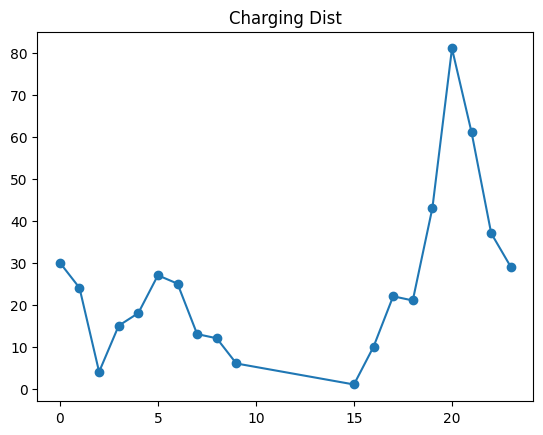

In [34]:
charging_df = df[df['chargingState'] == 'charging']
grouped_chg_df = charging_df.groupby('HourDay')['createdAt'].count()
plt.plot(grouped_chg_df.index.to_list(), grouped_chg_df.to_list(), 'o-')
plt.title('Charging Dist')

Text(0.5, 1.0, 'Discharging Dist')

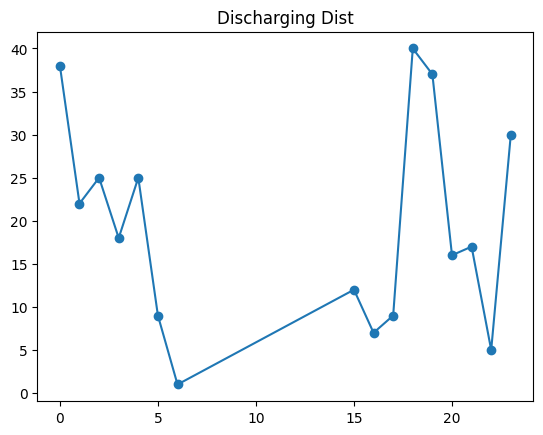

In [33]:
charging_df = df[df['chargingState'] == 'discharging']
grouped_chg_df = charging_df.groupby('HourDay')['createdAt'].count()
plt.plot(grouped_chg_df.index.to_list(), grouped_chg_df.to_list(), 'o-')
plt.title('Discharging Dist')

Text(0.5, 1.0, 'Discharging Dist')

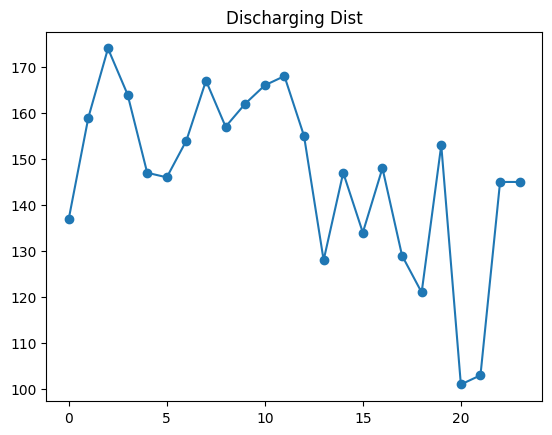

In [35]:
charging_df = df[df['chargingState'] == 'idle']
grouped_chg_df = charging_df.groupby('HourDay')['createdAt'].count()
plt.plot(grouped_chg_df.index.to_list(), grouped_chg_df.to_list(), 'o-')
plt.title('Discharging Dist')

### Testing The total Wattage in this time frame

In [41]:
total_duration = df['createdAt'].iloc[-1] - df['createdAt'][0]

In [42]:
total_duration

Timedelta('21 days 09:15:38.145000')

In [54]:
polling_duration = 0.25 # hour fraction
total_energy = np.sum(df['chargerWattage'] * polling_duration)

In [56]:
total_energy/1e3

np.float64(808.1075)